# **Univaraite Stock Price Prediction Employing Deep Learning Models**


##1) Using LSTM Model

In [121]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

In [81]:
!pip install -q yfinance

In [86]:
# Get the stock quote
df = pdr.get_data_yahoo('SBIN.NS', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,162.899994,163.600006,161.139999,162.764999,145.608536,14464990
2012-01-03,164.399994,171.000000,164.300003,170.565002,152.586334,21341020
2012-01-04,171.199997,171.389999,167.520004,169.604996,151.727524,22241630
2012-01-05,169.600006,171.854996,168.005005,169.244995,151.405487,21344840
2012-01-06,167.500000,170.759995,165.804993,167.274994,149.643127,21137420
...,...,...,...,...,...,...
2023-04-26,562.000000,567.000000,556.450012,566.349976,566.349976,23143882
2023-04-27,565.000000,567.400024,561.099976,564.750000,564.750000,17845169
2023-04-28,567.799988,580.450012,565.500000,578.299988,578.299988,16183423


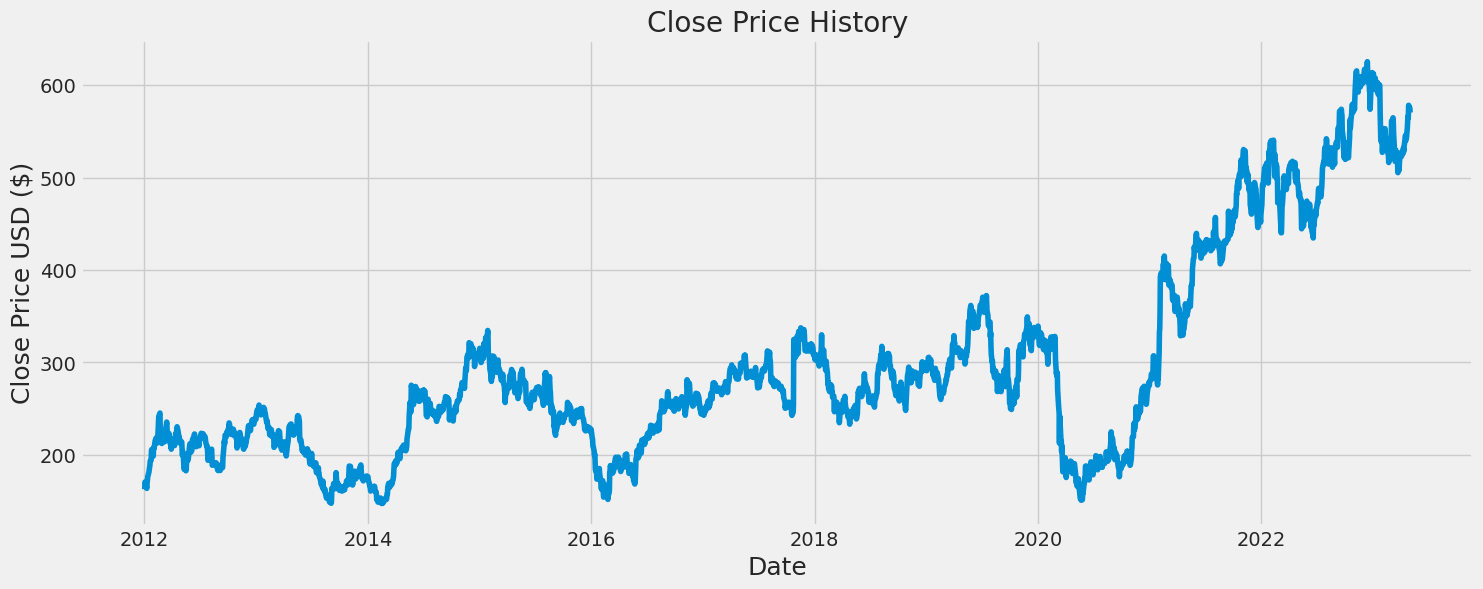

In [87]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [88]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2655

In [89]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03221859],
       [0.04853181],
       [0.04652402],
       ...,
       [0.90128412],
       [0.8950098 ],
       [0.88497093]])

In [90]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03221859, 0.04853181, 0.04652402, 0.0457711 , 0.04165097,
       0.03422639, 0.04789391, 0.05298659, 0.06081901, 0.06326599,
       0.07169448, 0.07746684, 0.08193208, 0.08589533, 0.09604928,
       0.09764923, 0.11862635, 0.12222362, 0.11858451, 0.10700839,
       0.12297654, 0.12633329, 0.1252771 , 0.13166646, 0.14411051,
       0.14211318, 0.14726857, 0.14857572, 0.1460451 , 0.13712512,
       0.1519534 , 0.16251517, 0.1833668 , 0.19731669, 0.20472036,
       0.16342494, 0.16457523, 0.15309323, 0.1357866 , 0.15845777,
       0.16186683, 0.15584348, 0.16168904, 0.14691303, 0.14101519,
       0.13969757, 0.15744342, 0.17509516, 0.17858786, 0.18429748,
       0.17268999, 0.15775713, 0.14304389, 0.14927636, 0.15879241,
       0.14368176, 0.14496801, 0.1346572 , 0.13710418, 0.12666793])]
[0.12292423551995518]

[array([0.03221859, 0.04853181, 0.04652402, 0.0457711 , 0.04165097,
       0.03422639, 0.04789391, 0.05298659, 0.06081901, 0.06326599,
       0.07169448, 0.07746684, 0.08

In [91]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2595/2595 [==============================] - 107s 40ms/step - loss: 0.0010


In [92]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 32ms/step


18.73679171715153

<ipython-input-93-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


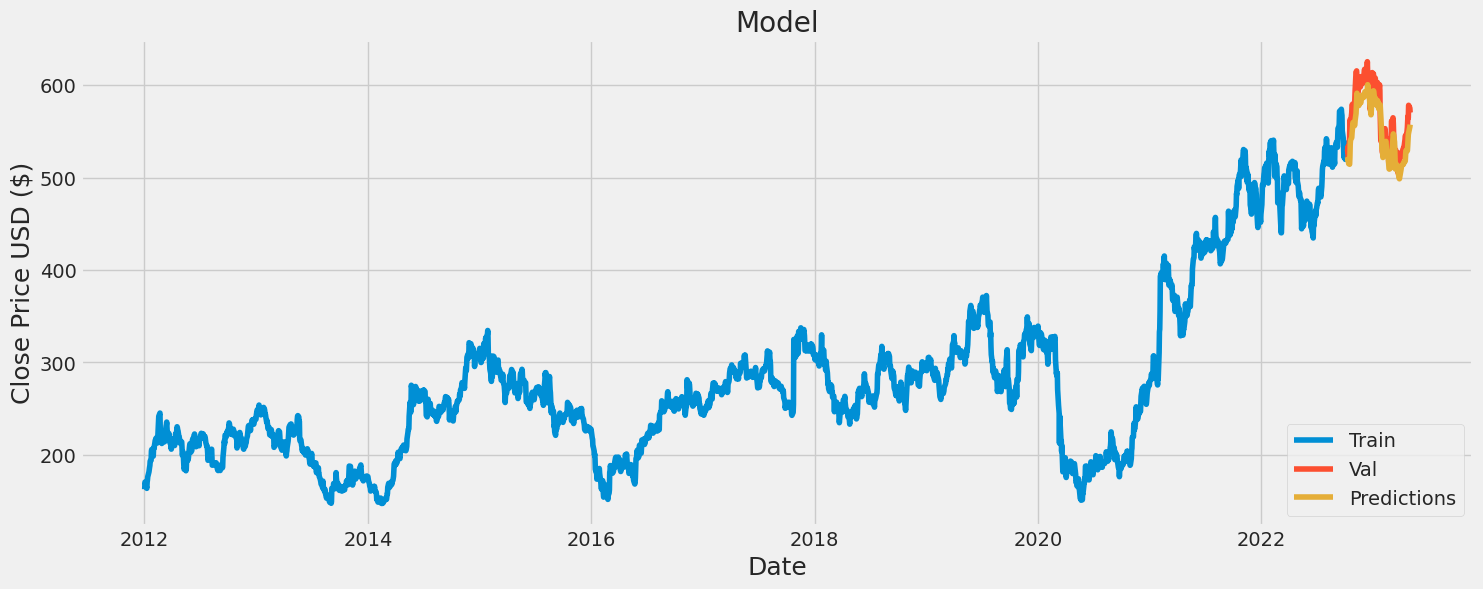

In [93]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [94]:
valid

,Close,Predictions
Date,,
2022-10-10,530.750000,522.432861
2022-10-11,527.400024,521.045044
2022-10-12,533.799988,518.343933
2022-10-13,521.450012,519.456177
2022-10-14,527.200012,515.084351
...,...,...
2023-04-26,566.349976,540.761841
2023-04-27,564.750000,546.620483
2023-04-28,578.299988,548.609863


##MULTIVARIATE LSTM 


In [95]:
import sys
print(sys.version)


3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


In [96]:
import numpy as np
np.random.seed(1)
import tensorflow
tensorflow.random.set_seed(2)
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import datetime as dt
import time
plt.style.use('ggplot')


In [97]:
df = pdr.get_data_yahoo('SBIN.NS', start='1997-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-01-01,22.502972,23.531408,22.502972,23.380445,15.914713,117594116
1997-01-02,23.493668,23.507820,22.672806,22.743568,15.481195,118900924
1997-01-03,22.550148,23.106825,22.512407,23.021908,15.670658,108118438
1997-01-06,23.116261,23.220047,22.620913,22.781309,15.506885,80613481
1997-01-07,22.658653,23.394600,22.517124,23.191742,15.786262,115423523
...,...,...,...,...,...,...
2023-04-26,562.000000,567.000000,556.450012,566.349976,566.349976,23143882
2023-04-27,565.000000,567.400024,561.099976,564.750000,564.750000,17845169
2023-04-28,567.799988,580.450012,565.500000,578.299988,578.299988,16183423


In [98]:
df.corr()['Close']


Open         0.999534
High         0.999799
Low          0.999784
Close        1.000000
Adj Close    0.998364
Volume      -0.194252
Name: Close, dtype: float64

In [99]:
print(df.describe().Volume) 
df.drop(df[df['Volume']==0].index, inplace = True) #Dropping rows with volume value 0


count    6.610000e+03
mean     2.817297e+07
std      2.649677e+07
min      0.000000e+00
25%      1.288907e+07
50%      2.033888e+07
75%      3.437050e+07
max      2.626771e+08
Name: Volume, dtype: float64


In [100]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
callbacks_list = [earlystop]

In [101]:
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
  
    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)
    
    # Adding Layers to the model
    model = Sequential()
    model.add(LSTM(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                   activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
    model.add(LSTM(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = optimizers.Adam(lr = lr), loss = 'mean_squared_error')
    #print(model.summary())
  
    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 0,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss'], history.history['val_loss']


In [102]:
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Loop for testing data
    for i in range(timesteps,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i][0])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)
  
    # Prediction Time !!!!
    Y_hat = model.predict(X_test)
    mse = mean_squared_error(Y_test,Y_hat)
    rmse = sqrt(mse)
    r = r2_score(Y_test,Y_hat)
    return mse, rmse, r, Y_test, Y_hat


In [103]:
def plot_data(Y_test,Y_hat):
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.title('Stock Prediction Graph using Multivariate-LSTM model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()


In [104]:
def plot_error(train_loss,val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.legend(['train','val'],loc = 'upper right')
    plt.show()

In [105]:
series = df[['Close','High','Volume']] # Picking the series with high correlation
print(series.shape)
print(series.tail())


(6507, 3)
                 Close        High    Volume
Date                                        
2023-04-26  566.349976  567.000000  23143882
2023-04-27  564.750000  567.400024  17845169
2023-04-28  578.299988  580.450012  16183423
2023-05-02  575.299988  580.849976  13667511
2023-05-03  570.500000  575.000000   9699527


In [106]:
train_start = dt.date(1997,1,1)
train_end = dt.date(2006,12,31)
train_data = series.loc[train_start:train_end]

val_start = dt.date(2007,1,1)
val_end = dt.date(2009,12,31)
val_data = series.loc[val_start:val_end]

test_start = dt.date(2010,1,1)
test_end = dt.date(2012,3,31)
test_data = series.loc[test_start:test_end]

print(train_data.shape,val_data.shape,test_data.shape)

(2485, 3) (734, 3) (558, 3)


In [107]:
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(2485, 3) (734, 3) (558, 3)


In [108]:
timesteps = 50
hl = [40,35]
lr = 1e-3
batch_size = 64
num_epochs = 250

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


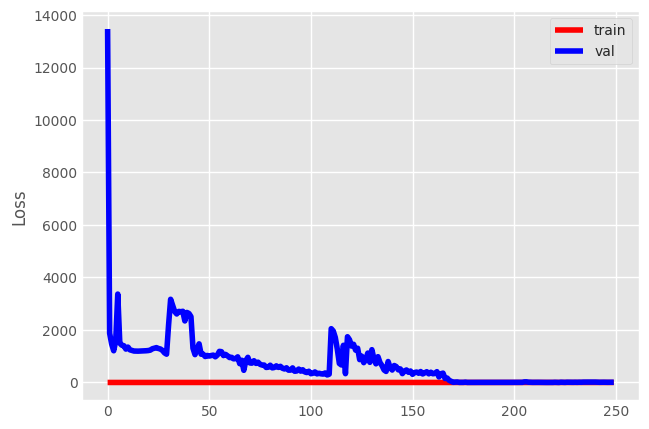

In [109]:
model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
plot_error(train_error,val_error)

16/16 [==============================] - 1s 15ms/step
MSE = 12.145200876029406
RMSE = 3.4849965388834185
R-Squared Score = -90.02106674691707


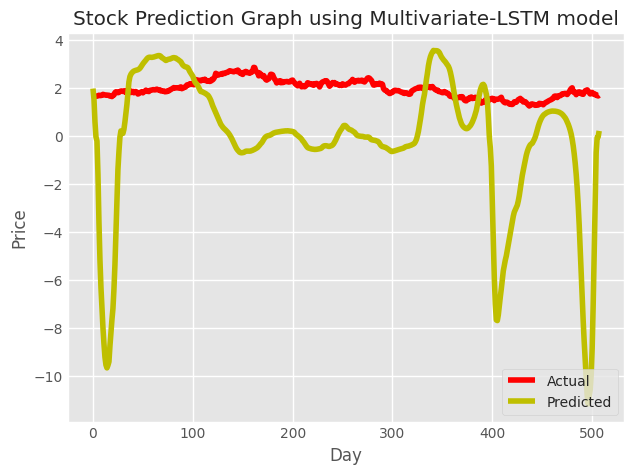

In [110]:
mse, rmse, r2_value,true,predicted = evaluate_model(model,test,timesteps)
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))
plot_data(true,predicted)


In [111]:
timesteps = 50
hl = [40,35]
lr = 1e-3
batch_size = 64
num_epochs = 50


In [112]:
series = df[['Close','High','Volume']] # Picking the multivariate series 
print(series.shape)
print(series.tail())

(6507, 3)
                 Close        High    Volume
Date                                        
2023-04-26  566.349976  567.000000  23143882
2023-04-27  564.750000  567.400024  17845169
2023-04-28  578.299988  580.450012  16183423
2023-05-02  575.299988  580.849976  13667511
2023-05-03  570.500000  575.000000   9699527


In [113]:
sc = MinMaxScaler()
series = sc.fit_transform(series[:5400])
series

array([[0.0304072 , 0.02835812, 0.44759461],
       [0.02847727, 0.02828824, 0.4525703 ],
       [0.02932072, 0.02710025, 0.41151584],
       ...,
       [0.824257  , 0.82609496, 0.10555079],
       [0.85334803, 0.84742577, 0.16974425],
       [0.82759037, 0.8423893 , 0.15477444]])

##SPLIT -1


In [114]:
splits = 5
split_size = 600
train = series[:3*split_size]
test = series[3*split_size:4*split_size]

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


18/18 [==============================] - 1s 15ms/step
Split 1
MSE = 0.00016099726407579415
RMSE = 0.012688469729474636
R-Squared Score = 0.9337980796239432


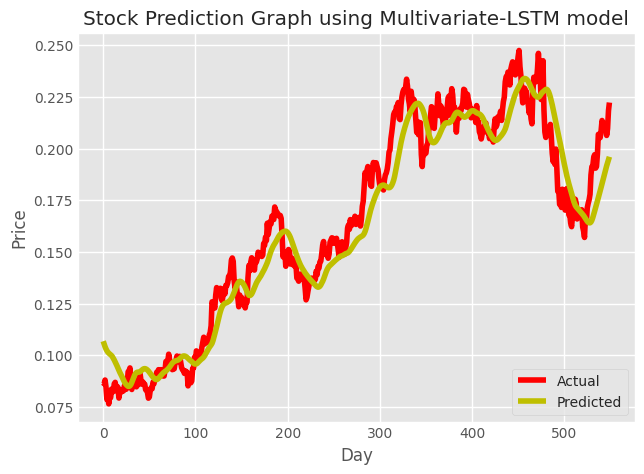

In [115]:
cross_val_results = list()
train_loss = pd.DataFrame()
val_loss = pd.DataFrame()
model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)

train_loss['Split1'] = train_error
val_loss['Split1'] = val_error
mse, rmse, r2_value,true,predicted = evaluate_model(model,test,timesteps)
print("Split 1")
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))
plot_data(true,predicted)
cross_val_results.append([mse,rmse,r2_value,0])

##SPLIT 2


18/18 [==============================] - 0s 16ms/step
Split 2
MSE = 0.11620232567085097
RMSE = 0.3408846222270095
R-Squared Score = -7.505384402144756


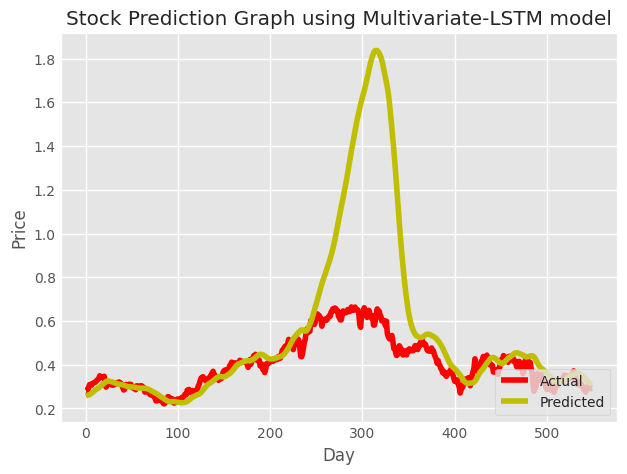

In [116]:
train = series[:4*split_size]
test = series[4*split_size:5*split_size]
X_train,Y_train = [],[]
# Loop for training data
for i in range(timesteps,train.shape[0]):
    X_train.append(train[i-timesteps:i])
    Y_train.append(train[i][0])
X_train,Y_train = np.array(X_train),np.array(Y_train)

start = time.time()
history = model.fit(X_train,Y_train,epochs = num_epochs,batch_size = batch_size,validation_split = 0.2,verbose = 0,
                    shuffle = False)
end = time.time()   
train_loss["Split2"] = history.history['loss']
val_loss["Split2"] = history.history['val_loss']
mse, rmse, r2_value,true,predicted = evaluate_model(model,test,timesteps)
print("Split 2")
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))
plot_data(true,predicted)
cross_val_results.append([mse,rmse,r2_value,end-start])


##SPLIT 3

18/18 [==============================] - 0s 22ms/step
Split 3
MSE = 211.6522176653324
RMSE = 14.548271982106067
R-Squared Score = -11203.012504241886


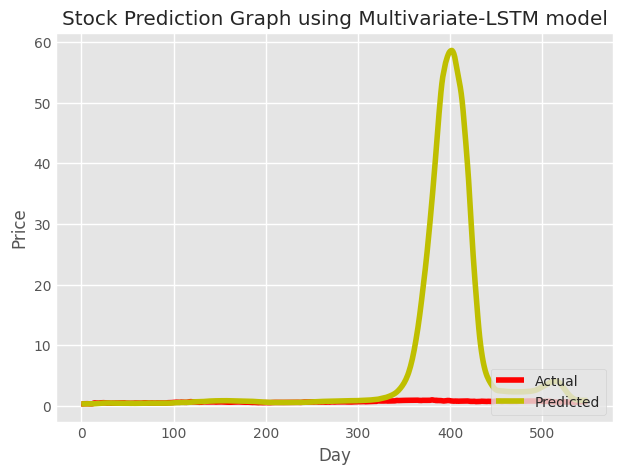

In [117]:
train = series[:5*split_size]
test = series[5*split_size:6*split_size]
X_train,Y_train = [],[]
# Loop for training data
for i in range(timesteps,train.shape[0]):
    X_train.append(train[i-timesteps:i])
    Y_train.append(train[i][0])
X_train,Y_train = np.array(X_train),np.array(Y_train)

start = time.time()
history = model.fit(X_train,Y_train,epochs = num_epochs,batch_size = batch_size,validation_split = 0.2,verbose = 0,
                    shuffle = False)
end = time.time()   
train_loss["Split3"] = history.history['loss']
val_loss["Split3"] = history.history['val_loss']
mse, rmse, r2_value,true,predicted = evaluate_model(model,test,timesteps)
print("Split 3")
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))
plot_data(true,predicted)
cross_val_results.append([mse,rmse,r2_value,end-start])


##SPLIT 4

18/18 [==============================] - 0s 16ms/step
Split 4
MSE = 0.0004936117804572017
RMSE = 0.022217375642888195
R-Squared Score = 0.9113782673215697


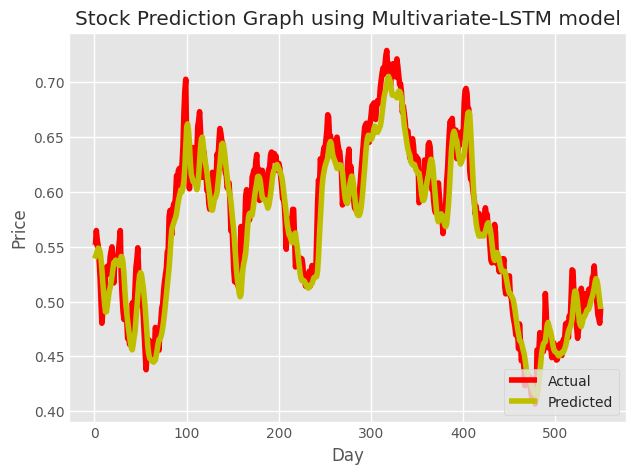

In [118]:
train = series[:6*split_size]
test = series[6*split_size:7*split_size]
X_train,Y_train = [],[]
# Loop for training data
for i in range(timesteps,train.shape[0]):
    X_train.append(train[i-timesteps:i])
    Y_train.append(train[i][0])
X_train,Y_train = np.array(X_train),np.array(Y_train)

start = time.time()
history = model.fit(X_train,Y_train,epochs = num_epochs,batch_size = batch_size,validation_split = 0.2,verbose = 0,
                    shuffle = False)
end = time.time()   
train_loss["Split4"] = history.history['loss']
val_loss["Split4"] = history.history['val_loss']
mse, rmse, r2_value,true,predicted = evaluate_model(model,test,timesteps)
print("Split 4")
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))
plot_data(true,predicted)
cross_val_results.append([mse,rmse,r2_value,end-start])


##SPLIT 5


18/18 [==============================] - 0s 20ms/step
Split 5
MSE = 0.0009198651576749024
RMSE = 0.03032927888484826
R-Squared Score = 0.9455701566851086


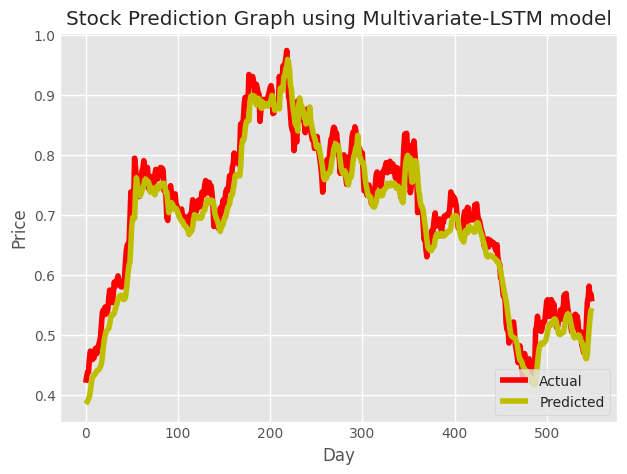

In [119]:
train = series[:7*split_size]
test = series[7*split_size:8*split_size]
X_train,Y_train = [],[]
# Loop for training data
for i in range(timesteps,train.shape[0]):
    X_train.append(train[i-timesteps:i])
    Y_train.append(train[i][0])
X_train,Y_train = np.array(X_train),np.array(Y_train)

start = time.time()
history = model.fit(X_train,Y_train,epochs = num_epochs,batch_size = batch_size,validation_split = 0.2,verbose = 0,
                    shuffle = False)
end = time.time()   
train_loss["Split5"] = history.history['loss']
val_loss["Split5"] = history.history['val_loss']
mse, rmse, r2_value,true,predicted = evaluate_model(model,test,timesteps)
print("Split 5")
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))
plot_data(true,predicted)
cross_val_results.append([mse,rmse,r2_value,end-start])


##AVERAGE

In [120]:
CV_results = pd.DataFrame(cross_val_results,columns=['MSE','RMSE','R2_Score','Train_Time'])
print("Avg. MSE = {}".format(CV_results['MSE'].mean()))
print("Avg. RMSE = {}".format(CV_results['RMSE'].mean()))
print("Avg. R2-score = {}".format(CV_results['R2_Score'].mean()))


Avg. MSE = 42.35399889304109
Avg. RMSE = 2.9908783457180577
Avg. R2-score = -2241.54542842808
